In [9]:
from IPython.core.debugger import set_trace
import numpy as np

In [7]:
set_trace()

--Call--
> /home/przemyslaw/.local/lib/python3.6/site-packages/IPython/core/displayhook.py(252)__call__()
    250         sys.stdout.flush()
    251 
--> 252     def __call__(self, result=None):
    253         """Printing with history cache management.
    254 



ipdb>  continue


# Debugger
set_trace to użyteczna funkcja, która pozwala w dowolnym momencie przyjrzeć się zawartości zmiennych, które są w aktualnym scope'ie.

https://docs.python.org/3.7/library/pdb.html

In [10]:
def complicated_function(a, b, c, d):
    x = a + b - c
    y = np.array([b, c, d])
    z = np.array([a, b, c])
    m = y.transpose().dot(z)
    l = k = -1
    for i in  range(100):
        m *= np.log(0.05)
        if x > 4:
            set_trace()
            l += 1
        else:
            k -= 1
        x += 1
    

In [11]:
complicated_function(1, 1, 10, 5)

> <ipython-input-10-463d5e0b74ba>(11)complicated_function()
      9         if x > 4:
     10             set_trace()
---> 11             l += 1
     12         else:
     13             k -= 1



ipdb>  i


13


ipdb>  for j in range(i):


*** SyntaxError: unexpected EOF while parsing


ipdb>  for j in range(i): print(j)


0
1
2
3
4
5
6
7
8
9
10
11
12


ipdb>  continue


> <ipython-input-10-463d5e0b74ba>(10)complicated_function()
      8         m *= np.log(0.05)
      9         if x > 4:
---> 10             set_trace()
     11             l += 1
     12         else:



ipdb>  i


14


ipdb>  break
ipdb>  continue


> <ipython-input-10-463d5e0b74ba>(11)complicated_function()
      9         if x > 4:
     10             set_trace()
---> 11             l += 1
     12         else:
     13             k -= 1



ipdb>  i


15


ipdb>  return


> <ipython-input-10-463d5e0b74ba>(11)complicated_function()
      9         if x > 4:
     10             set_trace()
---> 11             l += 1
     12         else:
     13             k -= 1



ipdb>  i


16


ipdb>  list


      6     l = k = -1
      7     for i in  range(100):
      8         m *= np.log(0.05)
      9         if x > 4:
     10             set_trace()
---> 11             l += 1
     12         else:
     13             k -= 1
     14         x += 1
     15 



ipdb>  args


a = 1
b = 1
c = 10
d = 5


ipdb>  quit


BdbQuit: 

# Pytorch
## Standard imports

In [135]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [11]:
x = torch.tensor([1, 2, 3])
y = torch.tensor([-1, 1, 1])

## Weird multiplication WTF
W numpy jest podobnie, przyda się pisać to w kodzie czasami (zamiast metody `.dot()`)

In [12]:
x @ y

tensor(4)

In [13]:
x.t() @ y

tensor(4)

In [26]:
a = torch.tensor([[1, 2, 3]])
b = torch.tensor([[-1, 1, 1]])

In [27]:
a @ b

RuntimeError: size mismatch, m1: [1 x 3], m2: [1 x 3] at /pytorch/aten/src/TH/generic/THTensorMath.cpp:136

In [28]:
a.t() @ b

tensor([[-1,  1,  1],
        [-2,  2,  2],
        [-3,  3,  3]])

In [29]:
a @ b.t()

tensor([[4]])

In [30]:
torch.inverse(a.t().float() @ b.float())

RuntimeError: inverse_cpu: U(3,3) is zero, singular U.

## Functions using operators, methods and in-place methods (underscore convention)

In [35]:
a + 1

tensor([[2, 3, 4]])

In [36]:
a

tensor([[1, 2, 3]])

In [37]:
a.add(1)

tensor([[2, 3, 4]])

In [38]:
a

tensor([[1, 2, 3]])

In [39]:
a.add_(1)

tensor([[2, 3, 4]])

In [40]:
a  # value of a changes in-place

tensor([[2, 3, 4]])

In [52]:
torch.eye(3).add_(1).inverse().numpy()

array([[ 0.75      , -0.25      , -0.24999999],
       [-0.25      ,  0.75      , -0.25      ],
       [-0.25      , -0.25      ,  0.75      ]], dtype=float32)

In [53]:
torch.from_numpy(np.eye(3))

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]], dtype=torch.float64)

## Autograd

In [102]:
# from torch import autograd

In [123]:
x = torch.tensor(4.)
x

tensor(4.)

In [124]:
x = torch.tensor(4., requires_grad=True)
x

tensor(4., requires_grad=True)

In [125]:
x.requires_grad

True

In [126]:
print(x.grad)

None


In [127]:
y = x**2
print(x.grad)

None


In [128]:
y.backward()  # CALCULATE THE GRADIENTS
print(x.grad)

tensor(8.)


## Using GPU 

In [129]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [130]:
data = torch.eye(3)
data.to(device)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

## Regression problem

In [23]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

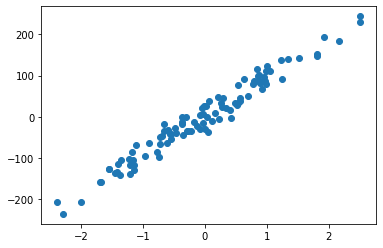

In [126]:
x, y = make_regression(n_features = 1, noise=20)
x = torch.tensor(x).float(); 
y = torch.tensor(y).float().reshape(-1, 1)
plt.scatter(x, y)

In [127]:
#torch.distributions.normal.Normal(loc, scaletorch.distributions.normal.Normal(loc, scale)

In [128]:
class Regressor(nn.Module):
    def __init__(self, n_features):
        super().__init__()
        self.weights = torch.rand([n_features, 1], requires_grad=True)
        self.bias = torch.rand([1, 1], requires_grad=True)
        print("Weights created. Bias =", self.bias)
    
    def forward(self, x):
        x = x @ self.weights + self.bias
        return x

In [129]:
model = Regressor(1)

Weights created. Bias = tensor([[0.7778]], requires_grad=True)


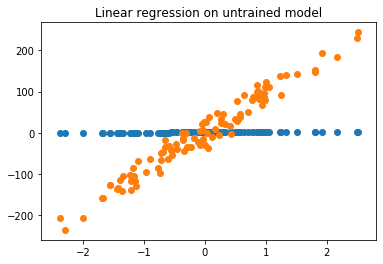

In [144]:
fig, ax = plt.subplots()
ax.scatter(x, model(x).detach())
ax.scatter(x, y)
ax.set_title("Linear regression on untrained model")

### Linear regression training

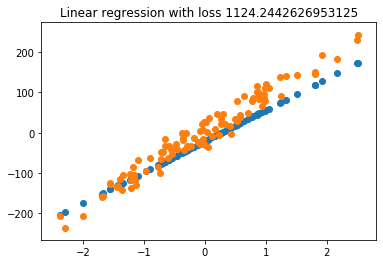

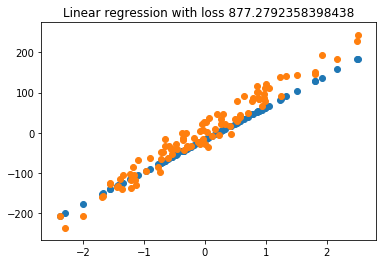

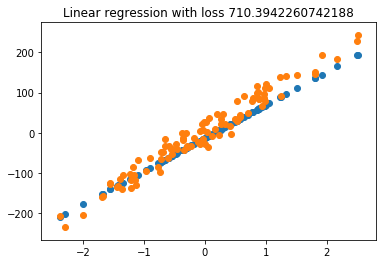

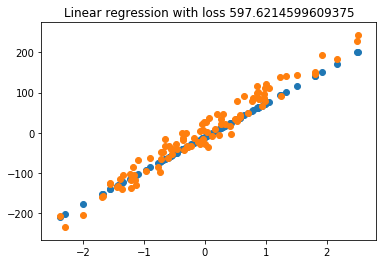

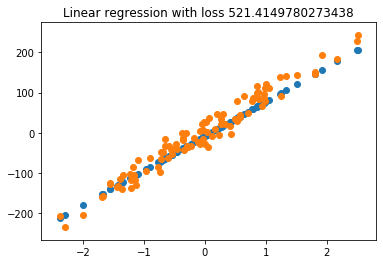

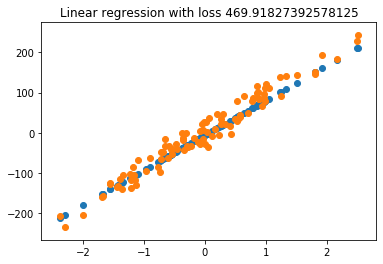

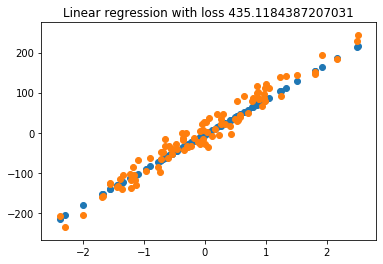

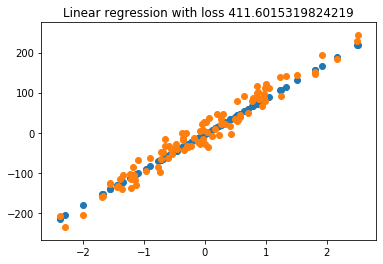

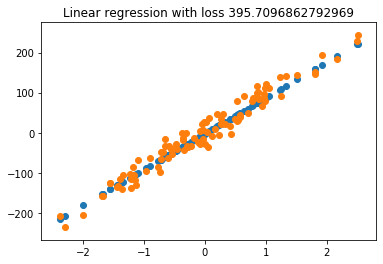

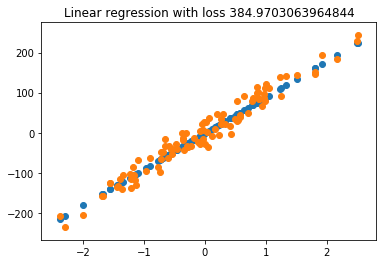

In [238]:
n_steps = 1000
optimizer = optim.SGD((model.weights, model.bias), lr = 0.001)
for i in range(n_steps):
    optimizer.zero_grad()  # IMPORTANT
    y_pred = model(x)
    loss = torch.mean((y_pred - y)**2)
    loss.backward()
    optimizer.step()

    # Plot 
    if i % 100 == 0:
        fig, ax = plt.subplots()
        ax.scatter(x, model(x).detach())
        ax.scatter(x, y)
        ax.set_title("Linear regression with loss {}".format(loss))
        plt.show()

In [141]:
for par in model.parameters():
    print(par)